In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
plt.rcParams["figure.figsize"] = (25,5)
plt.rcParams["axes.grid"] = True

In [2]:
data = np.load("./resamp.npy")

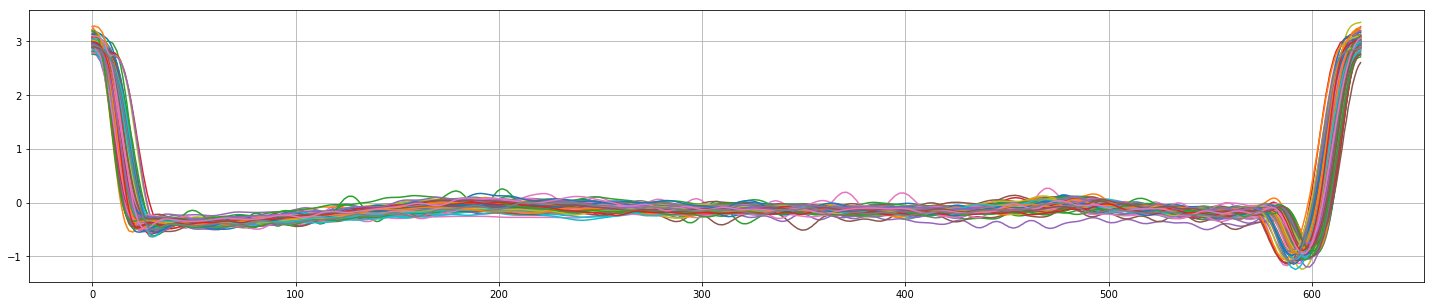

In [5]:
for sig in data:
    plt.plot(sig)
plt.show()

In [58]:
from wfdb import processing
norm = processing.normalize_bound(data,0,1)

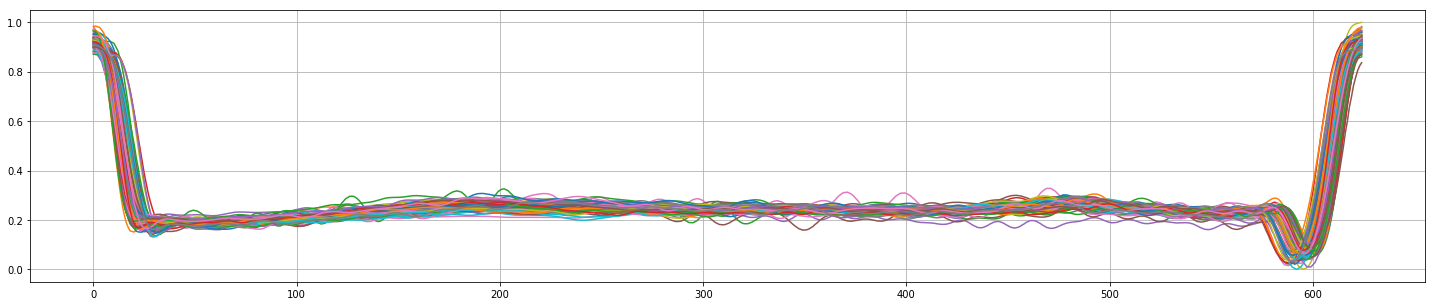

In [59]:
for sig in norm:
    plt.plot(sig)
plt.show()

In [47]:
def Layer(X,Input,Output,batchNorm=True,Activation='None',Dropout=0.2):
    W = tf.Variable(tf.random_normal([Input,Output],stddev=0.01))
    b = tf.Variable(tf.random_normal([Output],stddev=0.01))
    logit = tf.matmul(X,W) + b
    
    if(batchNorm):
        logit = tf.layers.batch_normalization(logit,momentum=0.99)
    
    if(Activation == 'relu'):
        logit = tf.nn.relu(logit)
    elif(Activation == 'leaky_relu'):
        logit = tf.nn.leaky_relu(logit,alpha=0.3)
    elif(Activation == 'softmax'):
        logit = tf.nn.softmax(logit)
    elif(Activation == 'sigmoid'):
        logit = tf.nn.sigmoid(logit)
        
    if(Dropout > 0):
        logit = tf.nn.dropout(logit,0.2)
    
    return logit

# 첫번째

In [62]:
tf.reset_default_graph()

X = tf.placeholder(dtype=tf.float32,shape=[None,625])

en_layer_01 = Layer(X,625,412,Activation="sigmoid")
en_layer_02 = Layer(en_layer_01,412,256,Activation="sigmoid")
encoder = Layer(en_layer_02,256,128,Activation="sigmoid",Dropout=0)

de_layer_01 = Layer(encoder,128,256,Activation="sigmoid")
de_layer_02 = Layer(de_layer_01,256,412,Activation="sigmoid")
decoder = Layer(de_layer_02,412,625,Activation="sigmoid",Dropout=0)

cost = tf.reduce_mean(pow(X-decoder,2))
train = tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost)


# 두번째

In [52]:
tf.reset_default_graph()

X = tf.placeholder(dtype=tf.float32,shape=[None,625])

en_layer_01 = Layer(X,625,525,batchNorm=False)
en_layer_02 = Layer(en_layer_01,525,425,batchNorm=False)
encoder = Layer(en_layer_02,425,325,Activation="sigmoid",batchNorm=False,Dropout=0)

de_layer_01 = Layer(encoder,325,425,batchNorm=False)
de_layer_02 = Layer(de_layer_01,425,525,batchNorm=False)
decoder = Layer(de_layer_02,525,625,Activation="sigmoid",batchNorm=False,Dropout=0)

cost = tf.reduce_mean(pow(X-decoder,2))
train = tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost)


In [63]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

batch_size = 1

for epoch in range(1000):
    totalCost = 0
    for batch in range(batch_size):
        c, _, de_out = sess.run([cost,train,decoder],feed_dict={X:norm})
        totalCost += c
        
    if(epoch % 10 == 0):
        print("============================")
        print("Epoch : ",epoch)
        print("Total Cost : ",c)

Epoch :  0
Total Cost :  0.07707305
Epoch :  10
Total Cost :  0.0034377726
Epoch :  20
Total Cost :  0.00306937
Epoch :  30
Total Cost :  0.0032740263
Epoch :  40
Total Cost :  0.00307063
Epoch :  50
Total Cost :  0.002593182
Epoch :  60
Total Cost :  0.00263651
Epoch :  70
Total Cost :  0.002168748
Epoch :  80
Total Cost :  0.0022777205
Epoch :  90
Total Cost :  0.0024125155
Epoch :  100
Total Cost :  0.0022535399
Epoch :  110
Total Cost :  0.0021633203
Epoch :  120
Total Cost :  0.0022350757
Epoch :  130
Total Cost :  0.0020090756
Epoch :  140
Total Cost :  0.0016933703
Epoch :  150
Total Cost :  0.0018743888
Epoch :  160
Total Cost :  0.0017080123
Epoch :  170
Total Cost :  0.0017981437
Epoch :  180
Total Cost :  0.0013971849
Epoch :  190
Total Cost :  0.0015934391
Epoch :  200
Total Cost :  0.001484218
Epoch :  210
Total Cost :  0.0014485383
Epoch :  220
Total Cost :  0.0014786611
Epoch :  230
Total Cost :  0.001294275
Epoch :  240
Total Cost :  0.0013150132
Epoch :  250
Total Cost

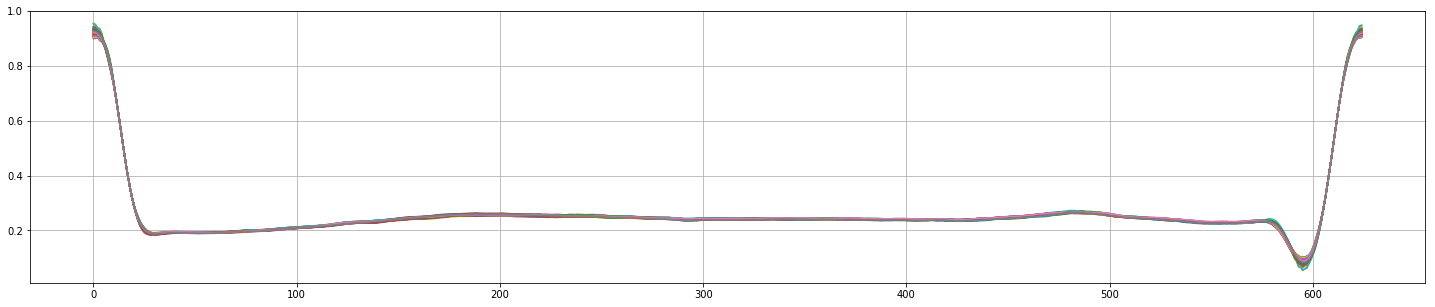

In [64]:
for sig in de_out:
    plt.plot(sig)
plt.show()